In [ ]:
# you can install the library using the following code
import sys
!{sys.executable} -m pip install git+https://github.com/ASinanSaglam/BNGSim

In [16]:
# Import our library
import BNGSim

In [17]:
# let's download a bngl file
import urllib.request
bngl_file = "cbngl_simple.bngl"
urllib.request.urlretrieve("https://raw.githubusercontent.com/RuleWorld/BNGTutorial/master/CBNGL/cBNGL_simple.bngl", bngl_file)

('cbngl_simple.bngl', <http.client.HTTPMessage at 0x15879995d48>)

In [18]:
import os
# the path to BNG installation where BNG2.pl is
bng_path = r'D:\rb_test\RuleBender-2.3.2-win\RuleBender\BioNetGen'
# we need the environment variable BNGPATH to be set to the installation folder
os.environ["BNGPATH"] = bng_path

# Simulator API

A very simple API for running simulations. It's very basic currently, needs more features, direct integration with the simulators and libRoadRunner integration. Some nice options it does have are being able to merge multiple simulation results into a single array and being able to save all the results into a HDF5 file. 

In [ ]:
sim = BNGSim.BNGSimulator(bngl_file) 

In [ ]:
# sim.run() will run the model as is, it will expect an 
# action block for it to do anything since by default the model
# is cleared of actions when loaded. 

# This is a convenience function that adds generate_network 
# and a simulate command 
# sim.simulate(start, end, nsteps, method='ode', nsims=1)
sim.simulate(0,100,100,method="ssa",nsims=3)

In [ ]:
# results are normally saved separately in sim.results in results objects
# that contains cdat/gdat (in the future will contain more)
print(sim.results)
print(sim.results[0].gdat[5:10])
# the gdat results can be combined in a single array
sim.combine_results()
# now the results will be stored in sim.combined_results
print(sim.combined_results.shape)

In [ ]:
# the results can be saved in a hdf5 file 
# via save_results method
sim.save_results("test.h5")
l = os.listdir(os.getcwd())
# let's see if it worked
print(list(filter(lambda x: x.endswith(".h5"), l)))

In [ ]:
# just as an example, let's plot our trajectories
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# this is a record array, it contains all the observable species
cr = sim.combined_results
cr[0].dtype

In [ ]:
# calculate the confidence interval
means = np.average(cr['Tot_P'], axis=0)
stds  = np.std(cr['Tot_P'], axis=0)
stde  = stds/np.sqrt(cr.shape[0])
ci_size = stde*1.96
lb = means - ci_size
ub = means + ci_size
# plot the results
plt.plot(cr[0]['time'], cr[0]['Tot_P'], label="0", c='r')
plt.plot(cr[1]['time'], cr[1]['Tot_P'], label="1", c='g')
plt.plot(cr[2]['time'], cr[2]['Tot_P'], label="2", c='b')
plt.fill_between(cr[0]['time'], lb, ub, color='k', alpha=0.5)
plt.xlabel("time")
plt.ylabel("tot P")
plt.legend(frameon=False)

### Simple parameter scan

In [19]:
bngl_file = "LV.bngl"
urllib.request.urlretrieve("https://raw.githubusercontent.com/RuleWorld/BNGTutorial/master/ABC/LV.bngl", bngl_file)
sim = BNGSim.BNGSimulator(bngl_file)

BNG2.pl seems to be working
BNG2.pl seems to be working
Attempting to generate XML
Parsing XML
XML parsed


In [27]:
print(sim.model)

begin model

begin parameters
  Nav 602000000.0
  V (0.5*0.5)*0.01
  k1 1000000.0
  k2 100000000.0
  k3 130000.0
  _rateLaw1 k2/(Nav*V)
end parameters

begin molecule types
  S
  W
end molecule types

begin species
  S 1000
  W 500
end species

begin observables
  Molecules Stot S
  Molecules Wtot W
end observables

begin reaction rules
_R1: S -> S + S k1
_R2: S + W -> W + W _rateLaw1
_R3: W -> 0 k3
end reaction rules

end model
generate_network({overwrite=>1})
simulate({method=>"ode",t_start=>0,t_end=>0.0001,n_steps=>100})


In [21]:
print(sim.model.observables)


begin observables
  Molecules Stot S
  Molecules Wtot W
end observables



BNG2.pl seems to be working
['LV.bngl', 'LV.cdat', 'LV.gdat', 'LV.net']
Simulation succesful, loading results
Searching for existing files
Finding and loading .gdat file
Finding and loading .cdat file
Finding and loading .net file
Loaded results files


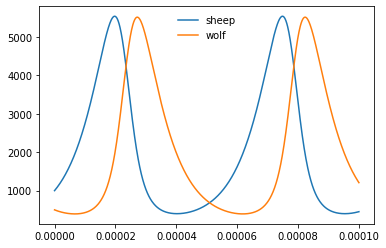

In [23]:
import seaborn
import matplotlib.pyplot as plt 

sim.simulate(0,0.0001,1000)
res = sim.results[-1].gdat
x,y1,y2 = res['time'], res['Stot'], res['Wtot']
sbrn.lineplot(x,y1,label="sheep")
sbrn.lineplot(x,y2,label="wolf")
plt.legend(frameon=False)

In [20]:
print(sim.model.parameters)


begin parameters
  Nav 602000000.0
  V (0.5*0.5)*0.01
  k1 129000.0
  k2 100000000.0
  k3 130000.0
  _rateLaw1 k2/(Nav*V)
end parameters



BNG2.pl seems to be working
['LV.bngl', 'LV.cdat', 'LV.gdat', 'LV.net']
Simulation succesful, loading results
Searching for existing files
Finding and loading .gdat file
Finding and loading .cdat file
Finding and loading .net file
Loaded results files
BNG2.pl seems to be working
['LV.bngl', 'LV.cdat', 'LV.gdat', 'LV.net']
Simulation succesful, loading results
Searching for existing files
Finding and loading .gdat file
Finding and loading .cdat file
Finding and loading .net file
Loaded results files
BNG2.pl seems to be working
['LV.bngl', 'LV.cdat', 'LV.gdat', 'LV.net']
Simulation succesful, loading results
Searching for existing files
Finding and loading .gdat file
Finding and loading .cdat file
Finding and loading .net file
Loaded results files


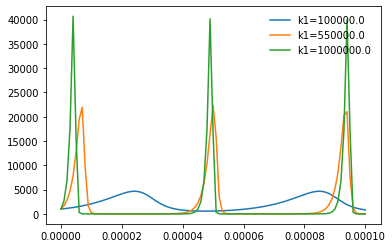

In [26]:
import numpy as np

param_name = "k1"
param_scan = np.linspace(1e5, 1e6, 3)
for iparam, param in enumerate(param_scan):
    sim.model.parameters[param_name] = param
    sim.simulate(0, 0.0001, 100)
    res = sim.results[-1].gdat
    x,y1 = res['time'], res['Stot']
    sbrn.lineplot(x,y1,label="{}={}".format(param_name,param))
plt.legend(frameon=False)

# Model API

A pythonic API to BNGL models. Goal is to be as simple, intuitive and pythonic as possible. 

In [ ]:
model = BNGSim.BNGModel(bngl_file)

In [ ]:
# One key feature is that pretty much everything can be printed 
# to see the BNGL code it corresponds to
print(model)

In [ ]:
# you can view "active" blocks, the ones that are being used in 
# this particular BNGL file
print(model.active_blocks)

### Parameter block

In [ ]:
# You can print any block BNGL
print(model.parameters)

In [ ]:
# we can loop over each parameter and access its values
for param in model.parameters:
    print(param, model.parameters[param])

In [ ]:
# we can set each parameter, the block is indexable by the parameter string
model.parameters['kp_R_TF'] = 100
print(model.parameters)

In [ ]:
# the parameters are also settable attributes
model.parameters.kp_R_TF = 50
print(model.parameters)

In [ ]:
# indexing the block with an integer gives back the 
# parameter name
print(model.parameters[2])

In [ ]:
# With the latest version of BNG the parameter block will 
# store both the value and the expression of each parameter
print(model.parameters.expressions)
# this will be empty right now, version of BNG that has this is not released
# yet. However you can clone the branch and copy Perl2 folder into your 
# own BioNetGen installations Perl2 folder if you wanted and this will 
# start working. 

# you can set the parameter to an expression
model.parameters.k_R_endo = "k_R_phos*10"
print(model.parameters)

### Compartment block

In [ ]:
print(model.compartments)

In [ ]:
for comp in model.compartments:
    print(comp, model.compartments[comp])

In [ ]:
# indexing with an integer gives you the name 
# of the corresponding compartment
print(model.compartments[2])

### Molecule type block

In [ ]:
# as per norm you can loop over each
for mtype in model.moltypes:
    print(mtype)

In [ ]:
# you can index the molecule types by an integer and 
# each mtype object contains the molecule it represents
molec = model.moltypes[3].molecule
print(molec)

In [ ]:
# a molecule can be modified, this will be the same
# for every molecule in every block

# here is an example for adding components.
molec.add_component("test", states=["a","b"])
print(molec)

# note that "states" keyword is reserved for molecule type
# block. For other molecules you should use "state" to represent the current
# state of a component
print(model.moltypes)

### Seed species block

In [ ]:
# each species is a pattern, value pair. a pattern is a list of molecules
# each species in the following loop is an object that contains both

# standard loop, you can use the species to index and get the values
for spec in model.species:
    print(spec, model.species[spec])

In [ ]:
# indexing with an integer gets you the 
# species object
spec = model.species[2]
print(spec)

In [ ]:
# indexing with the species object or a string 
# (that corresponds to the species) gets you the species value
print(model.species[spec])
# you can modify the seed species value
model.species[spec] = 100
print(model.species)

In [ ]:
# the compartment syntax "@X:" is set 
# at the level of the species object
spec.compartment = "PM"

# you can loop over the molecules in a species pattern and modify them
for molec in spec.molecules:
    print(molec)
    molec.add_component("test_2", state="c")
    molec.compartment = "EC"
print(model.species)

In [ ]:
# just to show an example on multiple molecules
# in a species object 
print(spec.molecules)
molec = spec.molecules[0]
spec.molecules.append(molec)
print(spec)

In [ ]:
# furthermore you can loop over the molecule itself 
# which allows you to loop over the components
spec = model.species[2]
print(spec)
molec = spec[0]
print(molec)
for component in molec:
    print(component)
# similarly you can index the molecule to get the component directly
print(molec[0])

### Observables

In [ ]:
print("########")
for iobs,obs in enumerate(model.observables):
    print("obs, item pair")
    print(obs, model.observables[obs])
    # for ease of use, an integer index will return 
    # the list of patterns of the observable
    print("list of patterns")
    print(model.observables[iobs])
    print("########")

In [ ]:
obs_pats = model.observables[1]
for pat in obs_pats:
    print("pattern")
    print(pat)
    # each pattern will have a list of molecules
    for molec in pat:
        print("molecule")
        print(molec)

### Functions

In [ ]:
for func in model.functions:
    print(func, model.functions[func])

In [ ]:
# can be overwritten
model.functions[func] = "(k_transcribe*(TF_nuc^n_P))/((KM_TF_dna_trans^n_P)+(TF_nuc^n_P))+100"
print(model.functions)

### Rules

In [ ]:
for rule in model.rules:
    print(rule)

In [ ]:
# rules are tuples of 
# (list of reactant patterns, list of product patterns, list of rate laws)
# you can access them in a couple ways
print(rule.reactants)
print(rule.products)
print(rule.rate_constants)
print(rule.rule_tpl)
# bidirectional rules need to have it correctly set
print(rule.bidirectional)

### Actions

In [ ]:
# actions can be added with add_action method
# takes in the action name and a list of tuples (argument name, argument value)
model.add_action("generate_network", [("overwrite",1)])
model.add_action("simulate", [("method","ode"),("t_start",0),("t_end",100),("n_steps",100)])
print(model.actions)

In [ ]:
# you can also clear the actions 
model.actions.clear_actions()

In [ ]:
# You can write the current model to a file via
with open("modified.bngl", "w") as f:
    f.write(str(model))
# or you can use the convenience function
model.write_model("modified_2.bngl")
l = os.listdir(os.getcwd())
print(list(filter(lambda x: x.endswith(".bngl"), l)))